# Setup

In this code the default version of the CTGAN is been used.
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [ ]:
pip install dython
pip install ctgan

In [8]:
import pandas as pd
data = pd.read_csv('train_set.csv')

### Training Data Contains 100 data points of High Entropy Borides

In [9]:
data

,rA/rC,Simple diff-X,Diff-Xmullican,delta-Hf,delta-Smix,(Delta),Possibility of formation
0,0.472200,0.80250,1.060725,0.0000,11.520,0.012284,1
1,0.531250,0.46750,0.495277,-28.2500,11.520,0.071177,0
2,0.586207,0.40800,0.192812,-18.4000,13.381,0.108733,0
3,0.548387,0.55500,0.626137,2.5000,11.520,0.074511,1
4,0.548387,0.54975,0.691175,-2.0250,13.075,0.042216,1
...,...,...,...,...,...,...,...
94,0.607143,0.30750,0.158489,-9.5000,11.520,0.107675,0
95,0.566667,0.47500,0.179954,-8.0000,11.520,0.132075,0
96,0.548387,0.58400,0.634859,0.4275,13.075,0.053662,1
97,0.459459,0.45950,0.605528,-0.2925,13.075,0.119313,1


#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 10000 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [11]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, epochs = 1000)

Gen. (-0.23) | Discrim. (-0.35): 100%|█████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.48it/s]


#Synthetic data generation

In [12]:
samples = ctgan.sample(1000)

In [13]:
samples

,rA/rC,Simple diff-X,Diff-Xmullican,delta-Hf,delta-Smix,(Delta),Possibility of formation
0,0.455610,0.441185,1.019047,0.412807,13.544412,0.126083,1
1,0.460142,0.896323,0.682786,-0.325025,13.298418,0.053034,1
2,0.541073,0.426114,0.172924,-21.110695,13.234328,0.118093,1
3,0.529551,0.593893,0.642391,-1.787955,13.468114,0.145130,1
4,0.564296,0.460553,0.065376,-23.246778,13.303240,0.144795,0
...,...,...,...,...,...,...,...
995,0.545532,0.465663,0.053695,-17.453853,13.193947,0.180533,0
996,0.472594,0.804242,0.562340,0.089865,13.694768,0.106138,1
997,0.477777,0.781267,1.217145,2.762664,13.276458,0.018281,1
998,0.461057,0.565147,1.164347,-0.357589,13.250814,0.115201,1


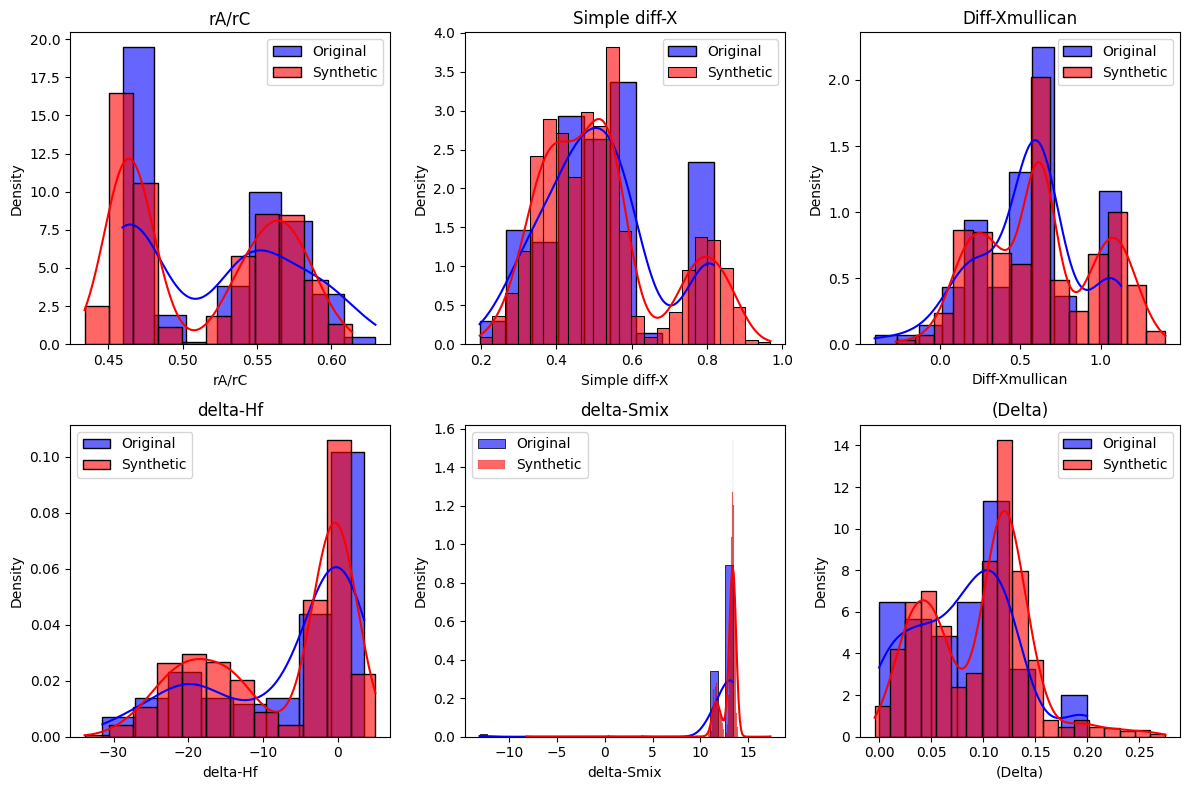

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature distributions for both original and synthetic datasets
def plot_feature_distributions_combined(original_df, synthetic_df):
    feature_columns = original_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(original_df[col], kde=True, color='blue', label='Original', stat='density', alpha=0.6)
        sns.histplot(synthetic_df[col], kde=True, color='red', label='Synthetic', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_original_df = pd.DataFrame(data, columns=data.columns[:-1])  # Original data
X_synthetic_df = pd.DataFrame(samples, columns=data.columns[:-1])  # Synthetic data from CTGAN

# Plot feature distributions for both original and synthetic datasets
plot_feature_distributions_combined(X_original_df, X_synthetic_df)


#Evaluation

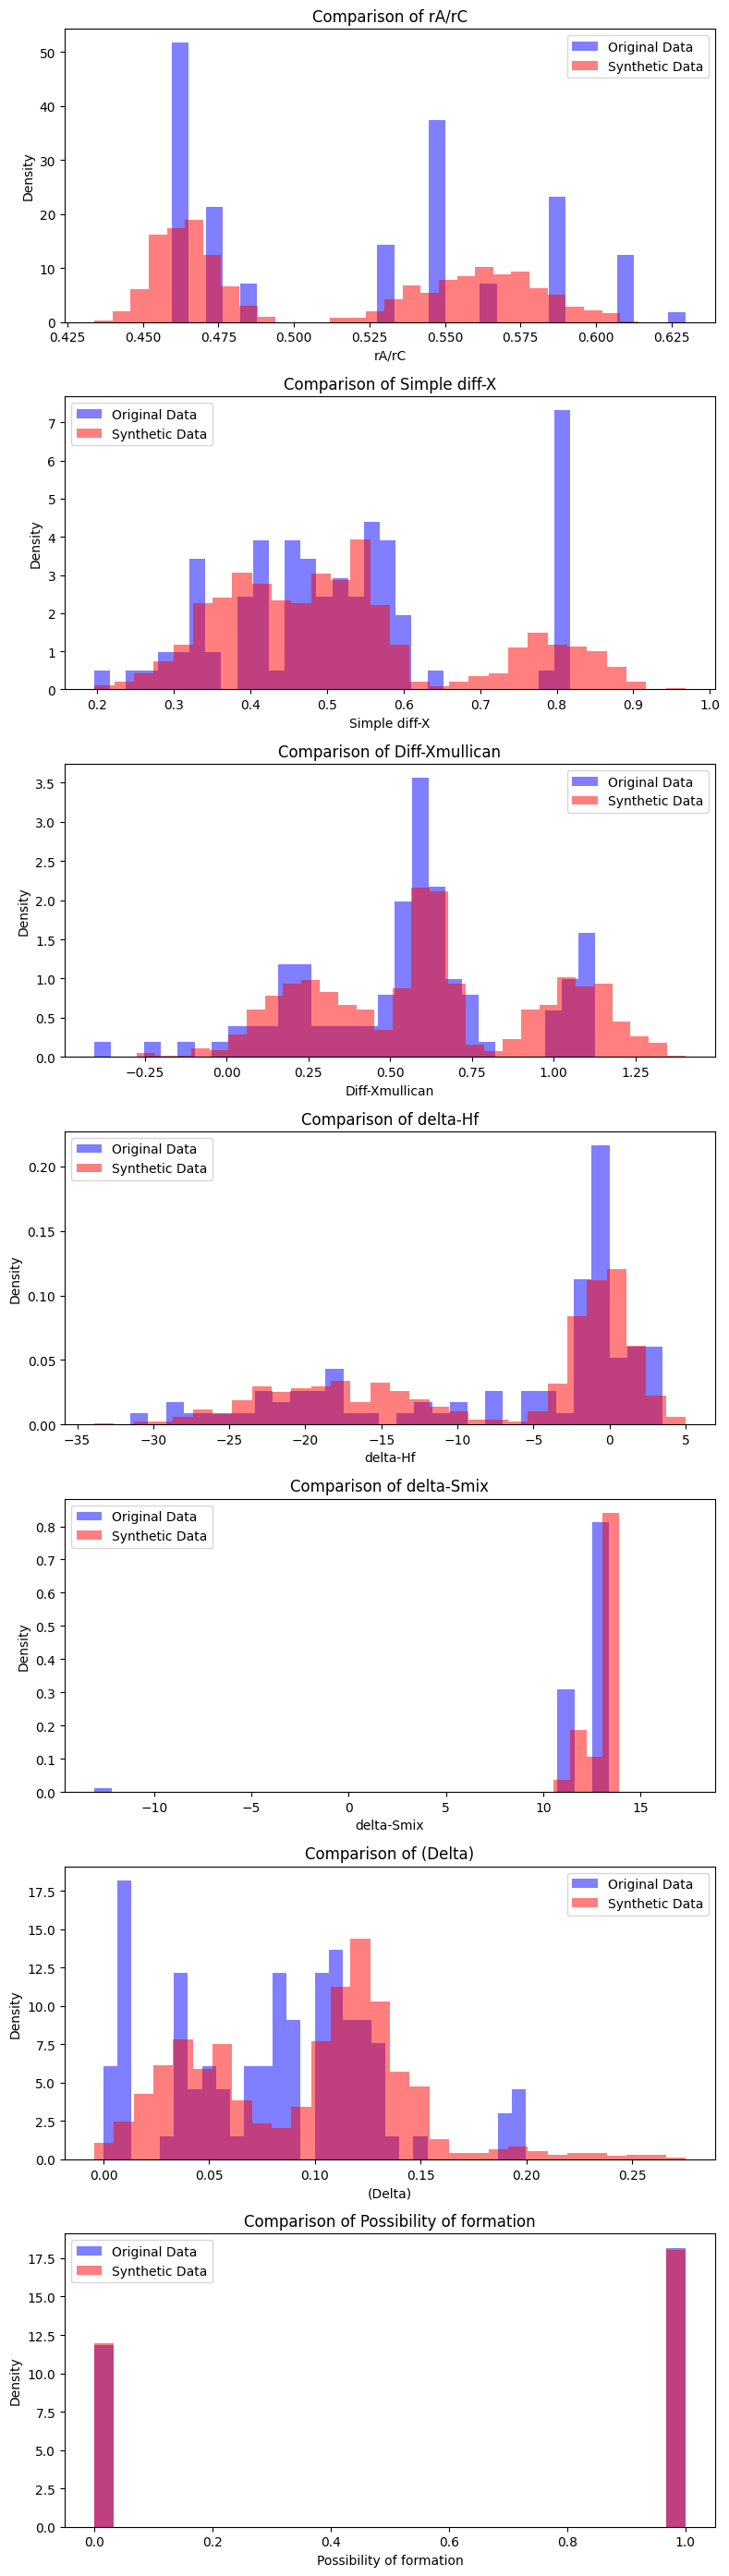

In [17]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Ensure both dataframes have the same columns
assert set(data.columns) == set(samples.columns), "Columns in data and samples do not match!"

# Number of columns
num_cols = len(data.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 4 * num_cols))

# Iterate over each column and plot histograms
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=30, alpha=0.5, label="Original Data", color='blue', density=True)
    axes[i].hist(samples[col], bins=30, alpha=0.5, label="Synthetic Data", color='red', density=True)
    axes[i].set_title(f"Comparison of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [52]:
samples.to_csv('samples_500_CTGAN.csv')

In [24]:
from sdv.datasets.demo import download_demo
from sdv.single_table import CTGANSynthesizer

data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

synthesizer = CTGANSynthesizer(metadata, epochs=100, verbose=True)

In [20]:
%%capture output
synthesizer.fit(data)

In [23]:
import pandas as pd

# Format the output into a table named loss_values
epochs_output = str(output).split('\n')
raw_values = [line.split(',') for line in epochs_output]

loss_values = pd.DataFrame(raw_values)[:-1]
loss_values.columns = ['Epoch', 'Generator Loss', 'Discriminator Loss']
loss_values['Epoch'] = loss_values['Epoch'].str.extract('(\d+)').astype(int)
loss_values['Generator Loss'] = loss_values['Generator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
loss_values['Discriminator Loss'] = loss_values['Discriminator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [22]:
import plotly.graph_objects as go

# Graph the table
fig = go.Figure(data=[go.Scatter(x=loss_values['Epoch'], y=loss_values['Generator Loss'], name='Generator Loss'),
                      go.Scatter(x=loss_values['Epoch'], y=loss_values['Discriminator Loss'], name='Discriminator Loss')])

fig.update_layout(title='CTGAN Loss Values', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

KeyError: 'Epoch'